In [1]:
# https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/

import opendatasets as od

od.download("https://www.kaggle.com/datasets/dawidcegielski/house-prices-in-poland")

# alexandertropin
# ea2bd9c043a1b0dbea99e82a6c45224f

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alexandertropin
Your Kaggle Key: ········


100%|████████████████████████████████████████| 704k/704k [00:00<00:00, 1.73MB/s]

In [ ]:
'''
Description:

address - Full addres
city - Warszawa (Warsaw), Kraków (Cracow), Poznań (Poznan).
floor - The number of the floor where the apartment is located
id - id
latitude - latitude
longitude - longitude
price - Price of apartment in PLN [TARGET]
rooms - Number of rooms in the apartment
sq - Number of square meters of the apartment
year - Year of the building / apartment
'''

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import geopy.distance

# 1. Preprocessing Data

## 1.1 Downloading data

In [3]:
file = ('house-prices-in-poland/Houses.csv')
df = pd.read_csv(file, encoding = 'ISO-8859-1')

df.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [4]:
df.shape

(23764, 11)

In [5]:
df.groupby(['city']).size()

city
Kraków      9764
Poznañ      4149
Warszawa    9851
dtype: int64

In [6]:
price_df = df.drop(['Unnamed: 0','address'], axis=1) #,'id'
# [['city', 'floor','id','latitude','longitude','price','rooms','sq','year']]
price_df.head()

,city,floor,id,latitude,longitude,price,rooms,sq,year
0,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [103]:
# price_df2 - price_df with corrected values (in the end)
price_df2 = price_df[list(price_df)]

price_df2 = price_df2.set_index('id')
price_df2.head()

,city,floor,latitude,longitude,price,rooms,sq,year
id,,,,,,,,
23918.0,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
17828.0,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
22784.0,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
4315.0,Poznañ,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
11770.0,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [104]:
price_df2.drop_duplicates().shape

(21702, 8)

In [105]:
price_df2 = price_df2.drop_duplicates()
price_df2 = price_df2.reset_index()
price_df2.head()

,id,city,floor,latitude,longitude,price,rooms,sq,year
0,23918.0,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,17828.0,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,22784.0,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,4315.0,Poznañ,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,11770.0,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [106]:
price_df2.isna().sum()

id           0
city         0
floor        0
latitude     0
longitude    0
price        0
rooms        0
sq           0
year         0
dtype: int64

In [107]:
price_df2.dtypes

id           float64
city          object
floor        float64
latitude     float64
longitude    float64
price        float64
rooms        float64
sq           float64
year         float64
dtype: object

In [108]:
price_df2['floor'] = price_df2['floor'].astype('int')
price_df2['price'] = price_df2['price'].astype('int')
price_df2['price'] = price_df2['price'].astype('int')
price_df2['rooms'] = price_df2['rooms'].astype('int')
price_df2['sq'] = price_df2['sq'].astype('int')
price_df2['year'] = price_df2['year'].astype('int')

# price_df - original dataset

# price_df2 - dataset without coordinates
# price_df2 = price_df.drop(['latitude', 'longitude'], axis=1)
price_df2.head()

,id,city,floor,latitude,longitude,price,rooms,sq,year
0,23918.0,Kraków,2,50.049224,19.970379,749000,3,74,2021
1,17828.0,Warszawa,3,52.249775,21.106886,240548,1,24,2021
2,22784.0,Kraków,2,50.066964,19.920025,427000,2,37,1970
3,4315.0,Poznañ,2,52.404212,16.882542,1290000,5,166,1935
4,11770.0,Warszawa,1,52.212225,20.972630,996000,5,105,2020


In [26]:
price_df2.dtypes

id           float64
city          object
floor          int64
latitude     float64
longitude    float64
price          int64
rooms          int64
sq             int64
year           int64
dtype: object

In [134]:
price_df2.shape

(21577, 11)

In [133]:
len(price_df2['id'].unique())

21577

In [141]:
# validate id
print(price_df2['id'].nunique())

21577


In [28]:
features = [f for f in list(price_df2) if f != 'id']
features

['city', 'floor', 'latitude', 'longitude', 'price', 'rooms', 'sq', 'year']

In [29]:
features_cont = [f for f in features if f not in ['city']]
features_cont

['floor', 'latitude', 'longitude', 'price', 'rooms', 'sq', 'year']

In [30]:
features_val = [f for f in features if f not in ['city', 'latitude', 'longitude']]
features_val

['floor', 'price', 'rooms', 'sq', 'year']

## 1.2 Deleting outliers and mistakes in data

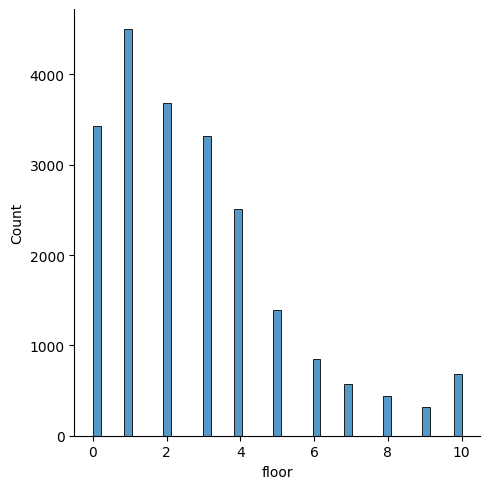

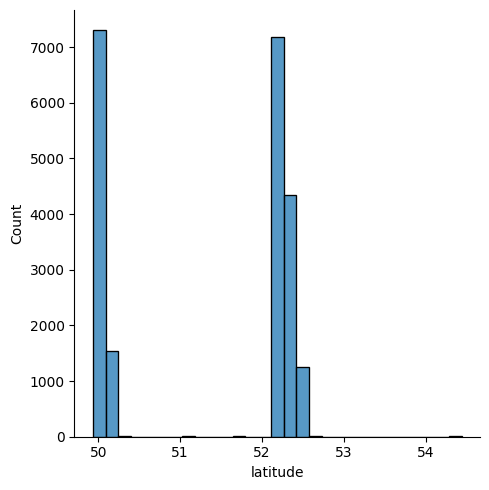

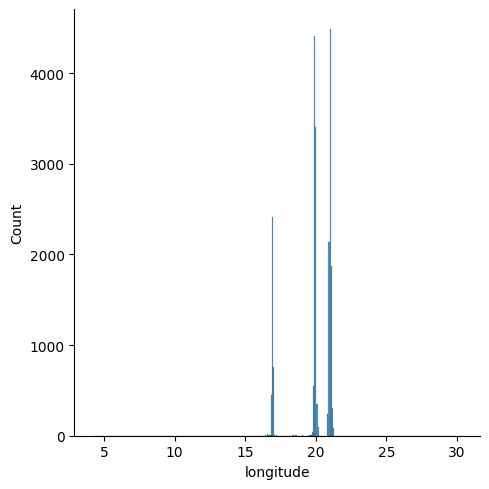

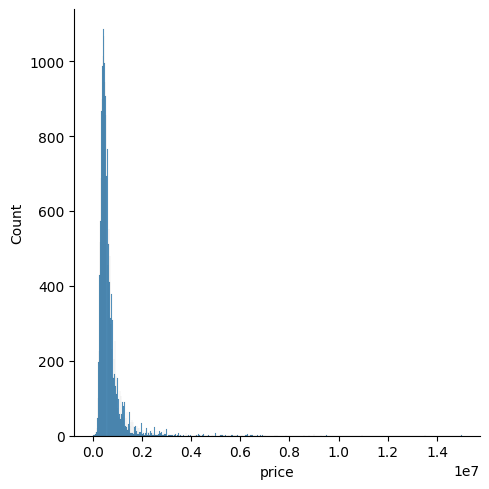

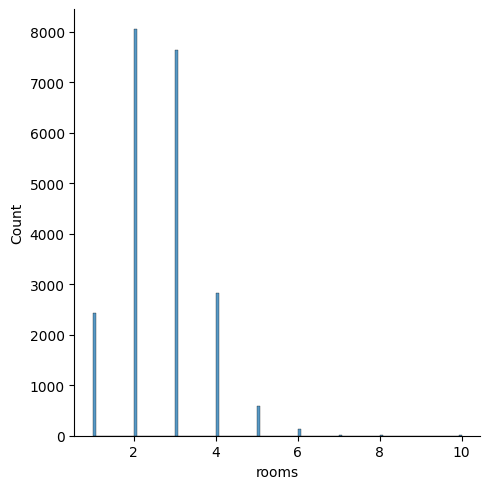

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x125b639c0> (for post_execute):


KeyboardInterrupt: 

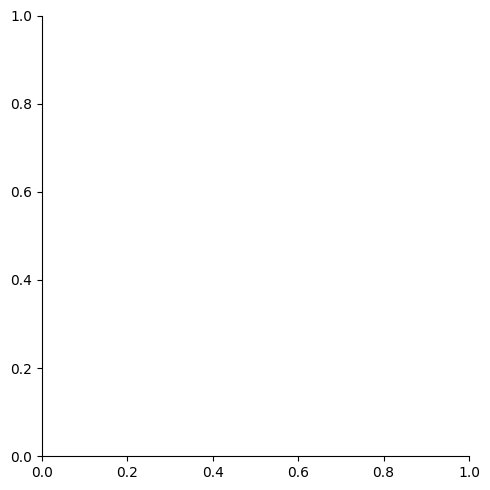

In [31]:
for col in features_cont:
    sns.displot(price_df2[col])
    plt.show()

In [ ]:
# for col in features_cont:
#     sns.boxplot(price_df2[col])
#     plt.xlabel(col)
#     plt.show()

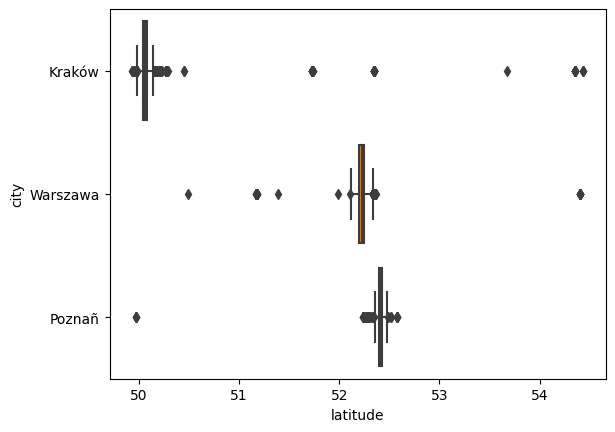

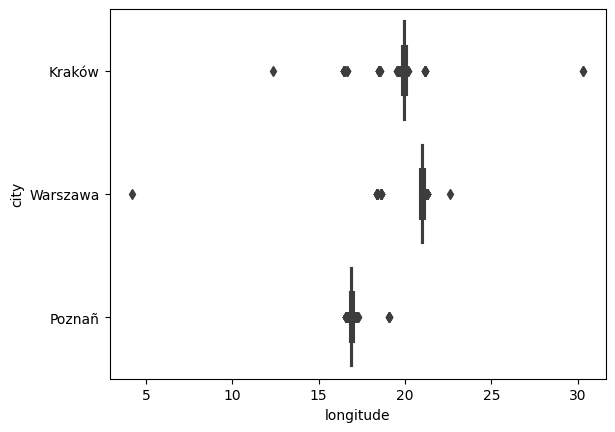

In [32]:
for col in ['latitude', 'longitude']:
    sns.boxplot(data=price_df, x=col, y="city")
    plt.xlabel(col)
    plt.show()

In [109]:
for city in ['Warszawa', 'Kraków', 'Poznañ']:
    print(city)
    for col in ['latitude', 'longitude']:
        print("\t{0} \t in [{1:.4f},\t{2:.4f}]".format(col, 
                                             np.percentile(np.array(price_df2[price_df2['city'] == city][col]), 0.5),
                                             np.percentile(np.array(price_df2[price_df2['city'] == city][col]), 99)
                                     ))

Warszawa
	latitude 	 in [52.1341,	52.3421]
	longitude 	 in [20.8783,	21.1945]
Kraków
	latitude 	 in [49.9747,	50.1609]
	longitude 	 in [19.7259,	20.1293]
Poznañ
	latitude 	 in [52.2902,	52.4613]
	longitude 	 in [16.7207,	16.9960]


In [40]:
# the centers of cities, from wikipedia.org

# Warszawa Coordinates: 52°13′48″N 21°00′40″E
# Kraków Coordinates: 50°03′41″N 19°56′14″E
# Poznañ Coordinates: 52°24′30″N 16°56′01″E

# https://www.fcc.gov/media/radio/dms-decimal
center_coordinates = {
    'Warszawa': [52.23, 21.011111],
    'Kraków': [50.061389, 19.937222],
    'Poznañ': [52.408333, 16.933611]
}
center_coord_df = pd.DataFrame(center_coordinates)
center_coord_df = center_coord_df.transpose().reset_index().rename(columns={0: 'latitude_center', 1: 'longitude_center', 'index':'city'})
center_coord_df


,city,latitude_center,longitude_center
0,Warszawa,52.230000,21.011111
1,Kraków,50.061389,19.937222
2,Poznañ,52.408333,16.933611


In [110]:
# deleting apartments with coordinates far from center

latitude_eps, longitude_eps = 0.25, 0.25

price_df2 = price_df2.merge(center_coord_df, on='city', how='left')
price_df2 = price_df2[
    (np.abs(price_df2['latitude_center'] - price_df2['latitude']) < latitude_eps) &
    (np.abs(price_df2['longitude_center'] - price_df2['longitude']) < longitude_eps) 
]
price_df2


,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center
0,23918.0,Kraków,2,50.049224,19.970379,749000,3,74,2021,50.061389,19.937222
1,17828.0,Warszawa,3,52.249775,21.106886,240548,1,24,2021,52.230000,21.011111
2,22784.0,Kraków,2,50.066964,19.920025,427000,2,37,1970,50.061389,19.937222
3,4315.0,Poznañ,2,52.404212,16.882542,1290000,5,166,1935,52.408333,16.933611
4,11770.0,Warszawa,1,52.212225,20.972630,996000,5,105,2020,52.230000,21.011111
...,...,...,...,...,...,...,...,...,...,...,...
21697,17663.0,Warszawa,5,52.263253,21.109533,360000,3,50,2022,52.230000,21.011111
21698,4516.0,Poznañ,3,52.378997,16.944244,294021,2,35,2022,52.408333,16.933611
21699,3976.0,Poznañ,0,52.449649,16.949408,543000,4,77,2020,52.408333,16.933611
21700,24148.0,Kraków,6,50.024231,19.959569,359000,2,38,2021,50.061389,19.937222


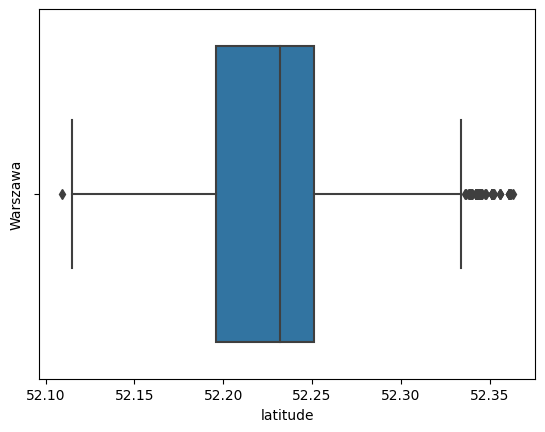

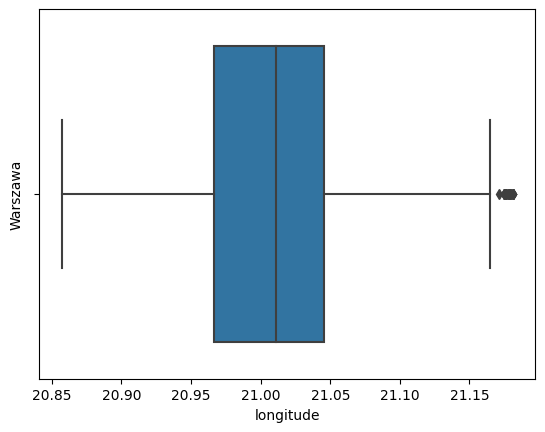

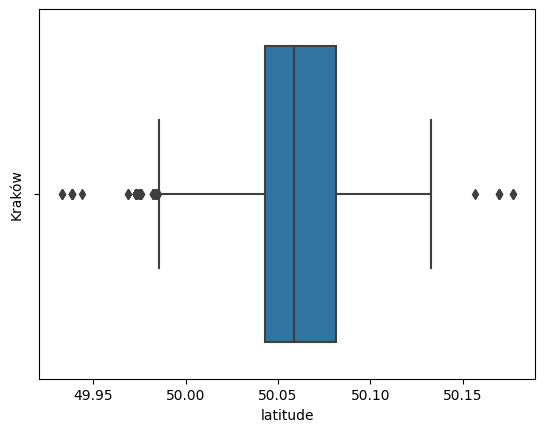

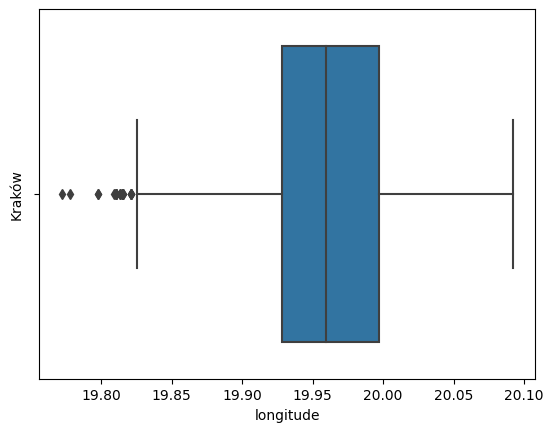

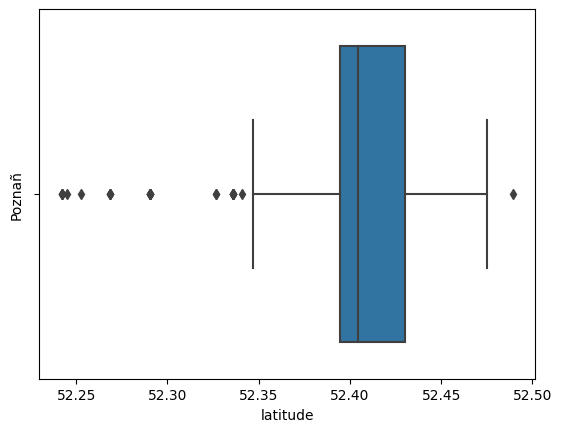

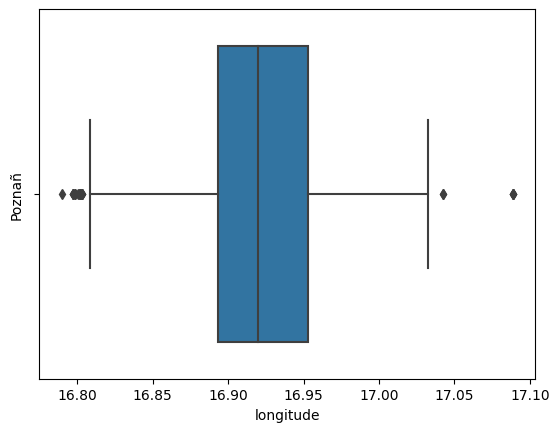

In [43]:
for city in ['Warszawa','Kraków','Poznañ']:
    for col in ['latitude', 'longitude']:
        sns.boxplot(data=price_df2[price_df2['city'] == city], x=col)
        plt.xlabel(col)
        plt.ylabel(city)
        plt.show()

In [111]:
# finding anomalies in price

price_df2.sort_values(['price'])

,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center
9622,6483.0,Warszawa,1,52.231958,21.006725,5000,2,50,2009,52.230000,21.011111
20863,3363.0,Poznañ,1,52.389775,16.917438,29900,2,49,2003,52.408333,16.933611
21629,200.0,Poznañ,3,52.385155,16.880016,69000,1,33,2003,52.408333,16.933611
11248,4182.0,Poznañ,5,52.400663,16.919733,79900,3,48,2000,52.408333,16.933611
20106,21089.0,Kraków,0,50.008840,20.011045,83000,1,26,2002,50.061389,19.937222
...,...,...,...,...,...,...,...,...,...,...,...
7718,9097.0,Warszawa,4,52.239122,21.024564,9300000,5,212,2011,52.230000,21.011111
129,13009.0,Warszawa,10,52.232810,21.019067,9506700,5,271,2021,52.230000,21.011111
3491,9096.0,Warszawa,5,52.239122,21.024564,10950000,5,249,2011,52.230000,21.011111
14219,11850.0,Warszawa,10,52.230955,21.001176,13500000,4,236,2017,52.230000,21.011111


In [112]:
# finding anomalies in sq

price_df2.sort_values(['sq'])

,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center
1341,12911.0,Warszawa,4,52.231958,21.006725,1220000,4,8,2019,52.230000,21.011111
18078,17091.0,Warszawa,0,52.232810,21.019067,225000,1,11,1968,52.230000,21.011111
6651,7591.0,Warszawa,0,52.236238,20.954781,215000,1,11,1961,52.230000,21.011111
2139,26812.0,Kraków,0,50.070360,19.918877,229000,1,12,2018,50.061389,19.937222
1739,14323.0,Warszawa,0,52.243417,20.962176,217000,1,12,1936,52.230000,21.011111
...,...,...,...,...,...,...,...,...,...,...,...
5599,19707.0,Kraków,4,50.070065,19.897989,6299000,10,442,2017,50.061389,19.937222
12871,30031.0,Kraków,4,50.067447,19.902934,6299000,10,442,2017,50.061389,19.937222
17270,1517.0,Poznañ,1,52.400663,16.919733,544169,4,8065,2021,52.408333,16.933611
10281,12896.0,Warszawa,1,52.231958,21.006725,389880,2,9000,2022,52.230000,21.011111


In [113]:
# finding anomalies in year

price_df2.sort_values(['year'])

,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center
7415,1603.0,Poznañ,2,52.326362,16.962886,235000,2,40,70,52.408333,16.933611
1027,14485.0,Warszawa,1,52.231958,21.006725,760000,3,53,75,52.230000,21.011111
13566,640.0,Poznañ,1,52.400663,16.919733,375000,3,64,80,52.408333,16.933611
4423,13832.0,Warszawa,10,52.231958,21.006725,320000,1,28,80,52.230000,21.011111
9918,8116.0,Warszawa,9,52.231958,21.006725,450000,2,47,81,52.230000,21.011111
...,...,...,...,...,...,...,...,...,...,...,...
6819,12230.0,Warszawa,2,52.231958,21.006725,776815,4,92,2023,52.230000,21.011111
21575,26633.0,Kraków,0,50.038029,19.995596,510752,3,58,2023,50.061389,19.937222
17370,12263.0,Warszawa,3,52.231958,21.006725,328361,2,34,2023,52.230000,21.011111
13138,6527.0,Warszawa,1,52.236238,20.954781,499497,1,31,2024,52.230000,21.011111


In [114]:
# Warszawa	1	5000	2	50	2009 
# Poznañ	1	544169	4	8065	2021
# Warszawa	1	389880	2	9000	2022
# Kraków	2	1007185	5	1007185	2020
# looks like an outliers of price and sq, I'll delete it:

price_df2 = price_df2.drop_duplicates()
price_df2 = price_df2[(price_df2['price'] > 20000) & (price_df2['sq'] < 500)]
price_df2

,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center
0,23918.0,Kraków,2,50.049224,19.970379,749000,3,74,2021,50.061389,19.937222
1,17828.0,Warszawa,3,52.249775,21.106886,240548,1,24,2021,52.230000,21.011111
2,22784.0,Kraków,2,50.066964,19.920025,427000,2,37,1970,50.061389,19.937222
3,4315.0,Poznañ,2,52.404212,16.882542,1290000,5,166,1935,52.408333,16.933611
4,11770.0,Warszawa,1,52.212225,20.972630,996000,5,105,2020,52.230000,21.011111
...,...,...,...,...,...,...,...,...,...,...,...
21697,17663.0,Warszawa,5,52.263253,21.109533,360000,3,50,2022,52.230000,21.011111
21698,4516.0,Poznañ,3,52.378997,16.944244,294021,2,35,2022,52.408333,16.933611
21699,3976.0,Poznañ,0,52.449649,16.949408,543000,4,77,2020,52.408333,16.933611
21700,24148.0,Kraków,6,50.024231,19.959569,359000,2,38,2021,50.061389,19.937222


In [115]:
# 2980 looks like a mistake in 1980

# deleting all rows with the year less than foundation year
# Warszawa 1300
# Poznañ 1253
# Kraków 990

price_df2 = price_df2.query("year >=1300 and city == 'Warszawa' or year >=1253 and city == 'Poznañ' or year >=990 and city == 'Kraków' ")
price_df2['year'] = price_df2['year'].apply(lambda x: x if x<=2100 else x-1000)
price_df2


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_74027/626499499.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['year'] = price_df2['year'].apply(lambda x: x if x<=2100 else x-1000)


,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center
0,23918.0,Kraków,2,50.049224,19.970379,749000,3,74,2021,50.061389,19.937222
1,17828.0,Warszawa,3,52.249775,21.106886,240548,1,24,2021,52.230000,21.011111
2,22784.0,Kraków,2,50.066964,19.920025,427000,2,37,1970,50.061389,19.937222
3,4315.0,Poznañ,2,52.404212,16.882542,1290000,5,166,1935,52.408333,16.933611
4,11770.0,Warszawa,1,52.212225,20.972630,996000,5,105,2020,52.230000,21.011111
...,...,...,...,...,...,...,...,...,...,...,...
21697,17663.0,Warszawa,5,52.263253,21.109533,360000,3,50,2022,52.230000,21.011111
21698,4516.0,Poznañ,3,52.378997,16.944244,294021,2,35,2022,52.408333,16.933611
21699,3976.0,Poznañ,0,52.449649,16.949408,543000,4,77,2020,52.408333,16.933611
21700,24148.0,Kraków,6,50.024231,19.959569,359000,2,38,2021,50.061389,19.937222


## 1.3 Adding new columns

In [116]:
# price_df3 - price_df2 with new columns (in the end)

price_df3 = price_df2[list(price_df2)]

In [117]:
# adding a decade

price_df3['decade'] = price_df3['year'].apply(lambda x: int(np.floor(x/10)*10) if x >= 1900 else 1800)
price_df3

,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center,decade
0,23918.0,Kraków,2,50.049224,19.970379,749000,3,74,2021,50.061389,19.937222,2020
1,17828.0,Warszawa,3,52.249775,21.106886,240548,1,24,2021,52.230000,21.011111,2020
2,22784.0,Kraków,2,50.066964,19.920025,427000,2,37,1970,50.061389,19.937222,1970
3,4315.0,Poznañ,2,52.404212,16.882542,1290000,5,166,1935,52.408333,16.933611,1930
4,11770.0,Warszawa,1,52.212225,20.972630,996000,5,105,2020,52.230000,21.011111,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
21697,17663.0,Warszawa,5,52.263253,21.109533,360000,3,50,2022,52.230000,21.011111,2020
21698,4516.0,Poznañ,3,52.378997,16.944244,294021,2,35,2022,52.408333,16.933611,2020
21699,3976.0,Poznañ,0,52.449649,16.949408,543000,4,77,2020,52.408333,16.933611,2020
21700,24148.0,Kraków,6,50.024231,19.959569,359000,2,38,2021,50.061389,19.937222,2020


In [118]:
# adding a price per square meter

price_df3['price_per_m'] = (price_df3['price']/price_df3['sq']).astype('int64')
price_df3

,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center,decade,price_per_m
0,23918.0,Kraków,2,50.049224,19.970379,749000,3,74,2021,50.061389,19.937222,2020,10121
1,17828.0,Warszawa,3,52.249775,21.106886,240548,1,24,2021,52.230000,21.011111,2020,10022
2,22784.0,Kraków,2,50.066964,19.920025,427000,2,37,1970,50.061389,19.937222,1970,11540
3,4315.0,Poznañ,2,52.404212,16.882542,1290000,5,166,1935,52.408333,16.933611,1930,7771
4,11770.0,Warszawa,1,52.212225,20.972630,996000,5,105,2020,52.230000,21.011111,2020,9485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21697,17663.0,Warszawa,5,52.263253,21.109533,360000,3,50,2022,52.230000,21.011111,2020,7200
21698,4516.0,Poznañ,3,52.378997,16.944244,294021,2,35,2022,52.408333,16.933611,2020,8400
21699,3976.0,Poznañ,0,52.449649,16.949408,543000,4,77,2020,52.408333,16.933611,2020,7051
21700,24148.0,Kraków,6,50.024231,19.959569,359000,2,38,2021,50.061389,19.937222,2020,9447


In [119]:
# adding a round sq:

price_df3['sq_round'] = price_df3['sq'].apply(lambda x: int(np.floor(x/10)*10))
price_df3

,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center,decade,price_per_m,sq_round
0,23918.0,Kraków,2,50.049224,19.970379,749000,3,74,2021,50.061389,19.937222,2020,10121,70
1,17828.0,Warszawa,3,52.249775,21.106886,240548,1,24,2021,52.230000,21.011111,2020,10022,20
2,22784.0,Kraków,2,50.066964,19.920025,427000,2,37,1970,50.061389,19.937222,1970,11540,30
3,4315.0,Poznañ,2,52.404212,16.882542,1290000,5,166,1935,52.408333,16.933611,1930,7771,160
4,11770.0,Warszawa,1,52.212225,20.972630,996000,5,105,2020,52.230000,21.011111,2020,9485,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21697,17663.0,Warszawa,5,52.263253,21.109533,360000,3,50,2022,52.230000,21.011111,2020,7200,50
21698,4516.0,Poznañ,3,52.378997,16.944244,294021,2,35,2022,52.408333,16.933611,2020,8400,30
21699,3976.0,Poznañ,0,52.449649,16.949408,543000,4,77,2020,52.408333,16.933611,2020,7051,70
21700,24148.0,Kraków,6,50.024231,19.959569,359000,2,38,2021,50.061389,19.937222,2020,9447,30


In [120]:
# adding a distance from the center of city

price_df3['radius'] = price_df3.apply(lambda x: geopy.distance.geodesic((x.latitude, x.longitude), (x.latitude_center, x.longitude_center)).km, axis=1)
price_df3['radius_dec'] = np.round(price_df3['radius'], 1)
price_df3['radius_ceil'] = np.ceil(price_df3['radius']).astype('int')
price_df3


,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center,decade,price_per_m,sq_round,radius,radius_dec,radius_ceil
0,23918.0,Kraków,2,50.049224,19.970379,749000,3,74,2021,50.061389,19.937222,2020,10121,70,2.732975,2.7,3
1,17828.0,Warszawa,3,52.249775,21.106886,240548,1,24,2021,52.230000,21.011111,2020,10022,20,6.902500,6.9,7
2,22784.0,Kraków,2,50.066964,19.920025,427000,2,37,1970,50.061389,19.937222,1970,11540,30,1.378660,1.4,2
3,4315.0,Poznañ,2,52.404212,16.882542,1290000,5,166,1935,52.408333,16.933611,1930,7771,160,3.505600,3.5,4
4,11770.0,Warszawa,1,52.212225,20.972630,996000,5,105,2020,52.230000,21.011111,2020,9485,100,3.290526,3.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21697,17663.0,Warszawa,5,52.263253,21.109533,360000,3,50,2022,52.230000,21.011111,2020,7200,50,7.673274,7.7,8
21698,4516.0,Poznañ,3,52.378997,16.944244,294021,2,35,2022,52.408333,16.933611,2020,8400,30,3.343692,3.3,4
21699,3976.0,Poznañ,0,52.449649,16.949408,543000,4,77,2020,52.408333,16.933611,2020,7051,70,4.721346,4.7,5
21700,24148.0,Kraków,6,50.024231,19.959569,359000,2,38,2021,50.061389,19.937222,2020,9447,30,4.432213,4.4,5


In [55]:
# new list of continious features

features_ext = [f for f in list(price_df3) if f not in ['id', 'city', 'price', 'price_per_m', 'latitude_center', 'longitude_center']]
print(features_ext)


['floor', 'latitude', 'longitude', 'rooms', 'sq', 'year', 'decade', 'sq_round', 'radius', 'radius_dec', 'radius_ceil']


In [56]:
# list of features for linear regression

features_reg = ['floor', 'rooms', 'sq', 'year', 'radius_dec']
features_reg

['floor', 'rooms', 'sq', 'year', 'radius_dec']

In [57]:
features_short2 = ['floor', 'rooms', 'sq', 'year', 'decade', 'radius_ceil']
features_short2

['floor', 'rooms', 'sq', 'year', 'decade', 'radius_ceil']

## 1.4 Adding Geospatial data (Warsaw's districts)

In [58]:
import geopandas as gpd

In [59]:
# geoJSON

import opendatasets as od

# https://github.com/andilabs/warszawa-dzielnice-geojson/blob/master/warszawa-dzielnice.geojson
od.download("https://raw.githubusercontent.com/andilabs/warszawa-dzielnice-geojson/master/warszawa-dzielnice.geojson")


Using downloaded and verified file: ./warszawa-dzielnice.geojson


In [60]:
geo_warsaw = gpd.read_file('warszawa-dzielnice.geojson')
geo_warsaw.head()

,cartodb_id,name,geometry
0,1,Warszawa,"MULTIPOLYGON (((21.02753 52.36513, 21.02539 52..."
1,22,Ochota,"MULTIPOLYGON (((21.00152 52.22807, 20.99059 52..."
2,25,Rembertów,"MULTIPOLYGON (((21.13242 52.23909, 21.13313 52..."
3,2,Bemowo,"MULTIPOLYGON (((20.87309 52.21666, 20.87307 52..."
4,19,Białołęka,"MULTIPOLYGON (((20.99622 52.28734, 20.99782 52..."


In [61]:
geo_warsaw.shape

(19, 3)

In [62]:
geo_warsaw.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

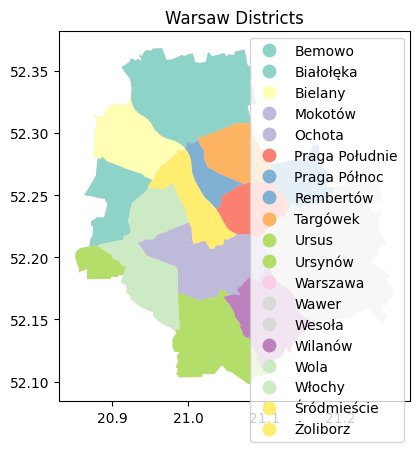

In [63]:
geo_warsaw.plot(column='name', cmap='Set3', legend=True)
plt.title('Warsaw Districts')
plt.show()

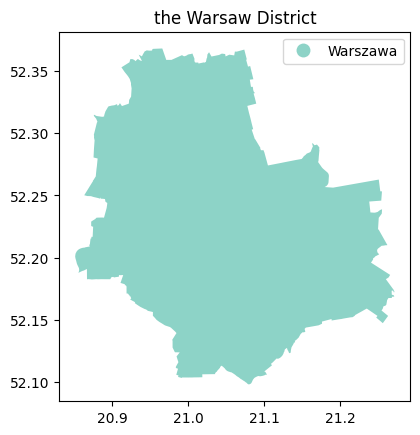

In [64]:
# there is a wrong district 'Warszawa' that equals entire city. I'll remove it

geo_warsaw_district = geo_warsaw[geo_warsaw['name'] == 'Warszawa']

geo_warsaw_district.plot(column='name', cmap='Set3', legend=True)
plt.title('the Warsaw District')
plt.show()

In [65]:
# only 18 correct districts

geo_warsaw_fixed = geo_warsaw[geo_warsaw['name'] != 'Warszawa']

geo_warsaw_fixed.shape

(18, 3)

In [121]:
warsaw_coord_df = price_df3[['id', 'city', 'latitude', 'longitude']][price_df3['city'] == 'Warszawa'].drop('city', axis=1)
warsaw_coord_df.head()


,id,latitude,longitude
1,17828.0,52.249775,21.106886
4,11770.0,52.212225,20.972630
7,13308.0,52.184058,21.044302
8,11387.0,52.140282,21.056345
9,10904.0,52.238974,20.913288


In [122]:
warsaw_coord_df.shape

(9101, 3)

In [123]:
warsaw_coord_gdf = gpd.GeoDataFrame(warsaw_coord_df, geometry=gpd.points_from_xy(warsaw_coord_df.longitude, warsaw_coord_df.latitude))

# from shapely.geometry import Point
# warsaw_coord_df['geometry'] = warsaw_coord_df.apply(lambda x: Point((x.longitude, x.latitude)), axis = 1)
# warsaw_coord_df = warsaw_coord_df.drop(['latitude','longitude','city','id'], axis=1)

warsaw_coord_gdf


,id,latitude,longitude,geometry
1,17828.0,52.249775,21.106886,POINT (21.10689 52.24977)
4,11770.0,52.212225,20.972630,POINT (20.97263 52.21222)
7,13308.0,52.184058,21.044302,POINT (21.04430 52.18406)
8,11387.0,52.140282,21.056345,POINT (21.05635 52.14028)
9,10904.0,52.238974,20.913288,POINT (20.91329 52.23897)
...,...,...,...,...
21692,14170.0,52.193818,21.013994,POINT (21.01399 52.19382)
21693,12377.0,52.169659,20.997015,POINT (20.99701 52.16966)
21696,9526.0,52.249338,20.897388,POINT (20.89739 52.24934)
21697,17663.0,52.263253,21.109533,POINT (21.10953 52.26325)


In [124]:
warsaw_coord_gdf = warsaw_coord_gdf.set_crs(epsg=4326) # set_crs instead of to_crs


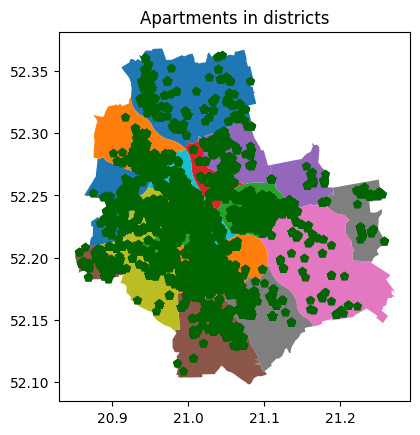

In [125]:
geo_warsaw_fixed.plot(column = 'name', legend = False) # , cmap = 'Set3'
plt.scatter(warsaw_coord_gdf.longitude, warsaw_coord_gdf.latitude, marker = 'p', c = 'darkgreen')
plt.title('Apartments in districts')
plt.show()

In [127]:
# to join the districts and stations datasets

warsaw_joined_gdf = gpd.sjoin(warsaw_coord_gdf, geo_warsaw_fixed, predicate='within')
warsaw_joined_gdf

,id,latitude,longitude,geometry,index_right,cartodb_id,name
1,17828.0,52.249775,21.106886,POINT (21.10689 52.24977),8,23,Praga Południe
11,13355.0,52.228633,21.106572,POINT (21.10657 52.22863),8,23,Praga Południe
19,9813.0,52.237396,21.071258,POINT (21.07126 52.23740),8,23,Praga Południe
59,9610.0,52.228633,21.106572,POINT (21.10657 52.22863),8,23,Praga Południe
67,12598.0,52.232803,21.054660,POINT (21.05466 52.23280),8,23,Praga Południe
...,...,...,...,...,...,...,...
21403,10637.0,52.262137,21.177371,POINT (21.17737 52.26214),2,25,Rembertów
21467,12153.0,52.261415,21.162819,POINT (21.16282 52.26141),2,25,Rembertów
21557,9789.0,52.263253,21.109533,POINT (21.10953 52.26325),2,25,Rembertów
21631,9496.0,52.245964,21.133045,POINT (21.13304 52.24596),2,25,Rembertów


In [143]:
warsaw_coord_district_df = warsaw_coord_df[['id']].merge(warsaw_joined_gdf[['id', 'name']], on='id', how='left').rename(columns={'name':'district'})
warsaw_coord_district_df

,id,district
0,17828.0,Praga Południe
1,11770.0,Ochota
2,13308.0,Mokotów
3,11387.0,Ursynów
4,10904.0,Bemowo
...,...,...
9096,14170.0,Mokotów
9097,12377.0,Mokotów
9098,9526.0,Bemowo
9099,17663.0,Rembertów


In [129]:
warsaw_coord_district_df.groupby('name').size()

name
Bemowo             417
Białołęka          779
Bielany            467
Mokotów           1430
Ochota             378
Praga Południe     840
Praga Północ       285
Rembertów          140
Targówek           301
Ursus              268
Ursynów            444
Wawer              168
Wesoła              79
Wilanów            302
Wola              1208
Włochy             206
Śródmieście       1204
Żoliborz           183
dtype: int64

In [144]:
price_df4 = price_df3.merge(warsaw_coord_district_df, on='id', how='left')
price_df4

,id,city,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center,decade,price_per_m,sq_round,radius,radius_dec,radius_ceil,district
0,23918.0,Kraków,2,50.049224,19.970379,749000,3,74,2021,50.061389,19.937222,2020,10121,70,2.732975,2.7,3,NaN
1,17828.0,Warszawa,3,52.249775,21.106886,240548,1,24,2021,52.230000,21.011111,2020,10022,20,6.902500,6.9,7,Praga Południe
2,22784.0,Kraków,2,50.066964,19.920025,427000,2,37,1970,50.061389,19.937222,1970,11540,30,1.378660,1.4,2,NaN
3,4315.0,Poznañ,2,52.404212,16.882542,1290000,5,166,1935,52.408333,16.933611,1930,7771,160,3.505600,3.5,4,NaN
4,11770.0,Warszawa,1,52.212225,20.972630,996000,5,105,2020,52.230000,21.011111,2020,9485,100,3.290526,3.3,4,Ochota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21572,17663.0,Warszawa,5,52.263253,21.109533,360000,3,50,2022,52.230000,21.011111,2020,7200,50,7.673274,7.7,8,Rembertów
21573,4516.0,Poznañ,3,52.378997,16.944244,294021,2,35,2022,52.408333,16.933611,2020,8400,30,3.343692,3.3,4,NaN
21574,3976.0,Poznañ,0,52.449649,16.949408,543000,4,77,2020,52.408333,16.933611,2020,7051,70,4.721346,4.7,5,NaN
21575,24148.0,Kraków,6,50.024231,19.959569,359000,2,38,2021,50.061389,19.937222,2020,9447,30,4.432213,4.4,5,NaN


In [ ]:
# datasets by cities

In [145]:
warsaw_df = price_df4[price_df4['city'] == 'Warszawa']
warsaw_df = warsaw_df.drop(['city'], axis=1).reset_index(drop=True)
warsaw_df.head()

,id,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center,decade,price_per_m,sq_round,radius,radius_dec,radius_ceil,district
0,17828.0,3,52.249775,21.106886,240548,1,24,2021,52.23,21.011111,2020,10022,20,6.902500,6.9,7,Praga Południe
1,11770.0,1,52.212225,20.972630,996000,5,105,2020,52.23,21.011111,2020,9485,100,3.290526,3.3,4,Ochota
2,13308.0,10,52.184058,21.044302,2890000,6,280,2003,52.23,21.011111,2000,10321,280,5.592890,5.6,6,Mokotów
3,11387.0,3,52.140282,21.056345,615000,4,63,1982,52.23,21.011111,1980,9761,60,10.451384,10.5,11,Ursynów
4,10904.0,1,52.238974,20.913288,429000,1,40,1999,52.23,21.011111,1990,10725,40,6.757307,6.8,7,Bemowo


In [146]:
warsaw_df.shape

(9101, 17)

In [148]:
krakow_df = price_df4[price_df4['city'] == 'Kraków']
krakow_df = krakow_df.drop(['city','district'], axis=1).reset_index(drop=True)
krakow_df.head()

,id,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center,decade,price_per_m,sq_round,radius,radius_dec,radius_ceil
0,23918.0,2,50.049224,19.970379,749000,3,74,2021,50.061389,19.937222,2020,10121,70,2.732975,2.7,3
1,22784.0,2,50.066964,19.920025,427000,2,37,1970,50.061389,19.937222,1970,11540,30,1.378660,1.4,2
2,26071.0,2,50.046943,19.997153,414600,1,34,2022,50.061389,19.937222,2020,12194,30,4.582913,4.6,5
3,22569.0,0,50.049893,19.990603,750000,4,81,2021,50.061389,19.937222,2020,9259,80,4.030940,4.0,5
4,27706.0,2,50.084041,19.978160,280000,1,16,1930,50.061389,19.937222,1930,17500,10,3.864897,3.9,4


In [151]:
krakow_df.shape

(8832, 16)

In [149]:
poznan_df = price_df4[price_df4['city'] == 'Poznañ']
poznan_df = poznan_df.drop(['city','district'], axis=1).reset_index(drop=True)
poznan_df.head()

,id,floor,latitude,longitude,price,rooms,sq,year,latitude_center,longitude_center,decade,price_per_m,sq_round,radius,radius_dec,radius_ceil
0,4315.0,2,52.404212,16.882542,1290000,5,166,1935,52.408333,16.933611,1930,7771,160,3.505600,3.5,4
1,6081.0,0,52.391608,16.994063,421427,3,60,2019,52.408333,16.933611,2010,7023,60,4.515918,4.5,5
2,1085.0,8,52.400663,16.919733,547000,4,77,2020,52.408333,16.933611,2020,7103,70,1.272997,1.3,2
3,3518.0,1,52.370993,16.863146,618636,3,66,2020,52.408333,16.933611,2020,9373,60,6.346460,6.3,7
4,5789.0,3,52.397345,16.961939,563905,4,77,2022,52.408333,16.933611,2020,7323,70,2.283042,2.3,3


In [150]:
poznan_df.shape

(3644, 16)

# 2. Analysis (add conclusions!!!)

## 2.1 Bivariate Analysis

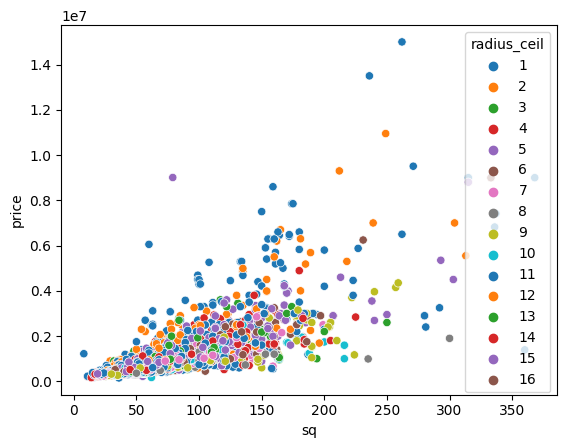

In [421]:
sns.scatterplot(x='sq', y='price', data=warsaw_df, hue='radius_ceil', palette = 'tab10')
plt.show()

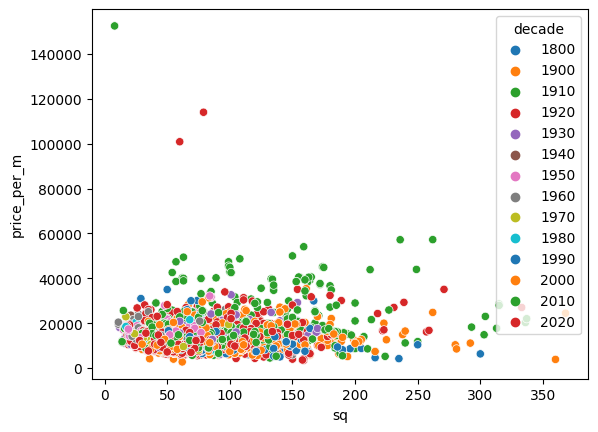

In [419]:
sns.scatterplot(x='sq', y='price_per_m', data=warsaw_df, hue='decade', palette = 'tab10')
plt.show()

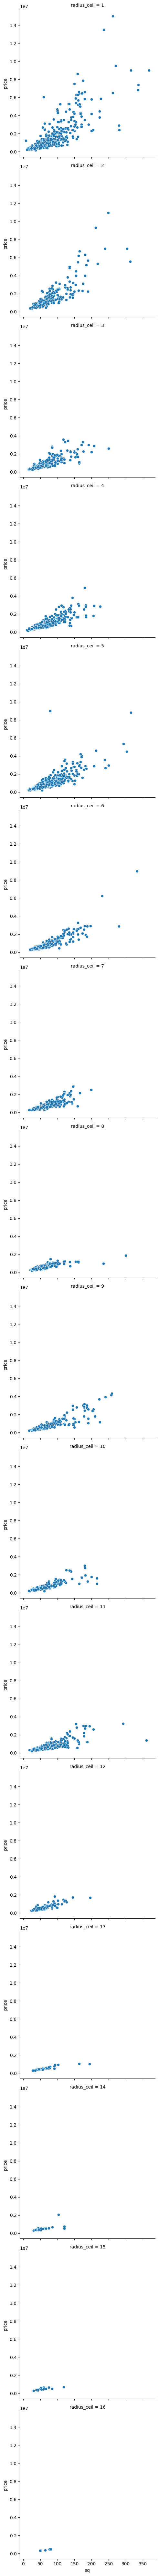

In [423]:
sns.relplot(x='sq', y='price', data=warsaw_df, kind='scatter', row='radius_ceil')

plt.show()

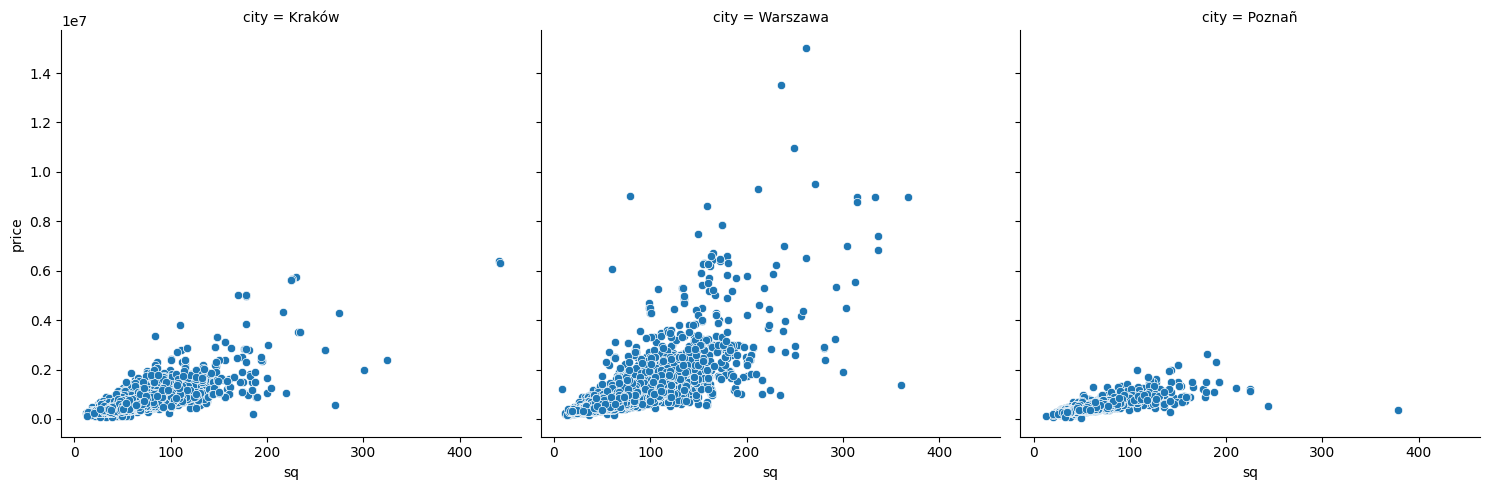

In [424]:
sns.relplot(x='sq', y='price', data=price_df3, kind='scatter', col='city')

plt.show()

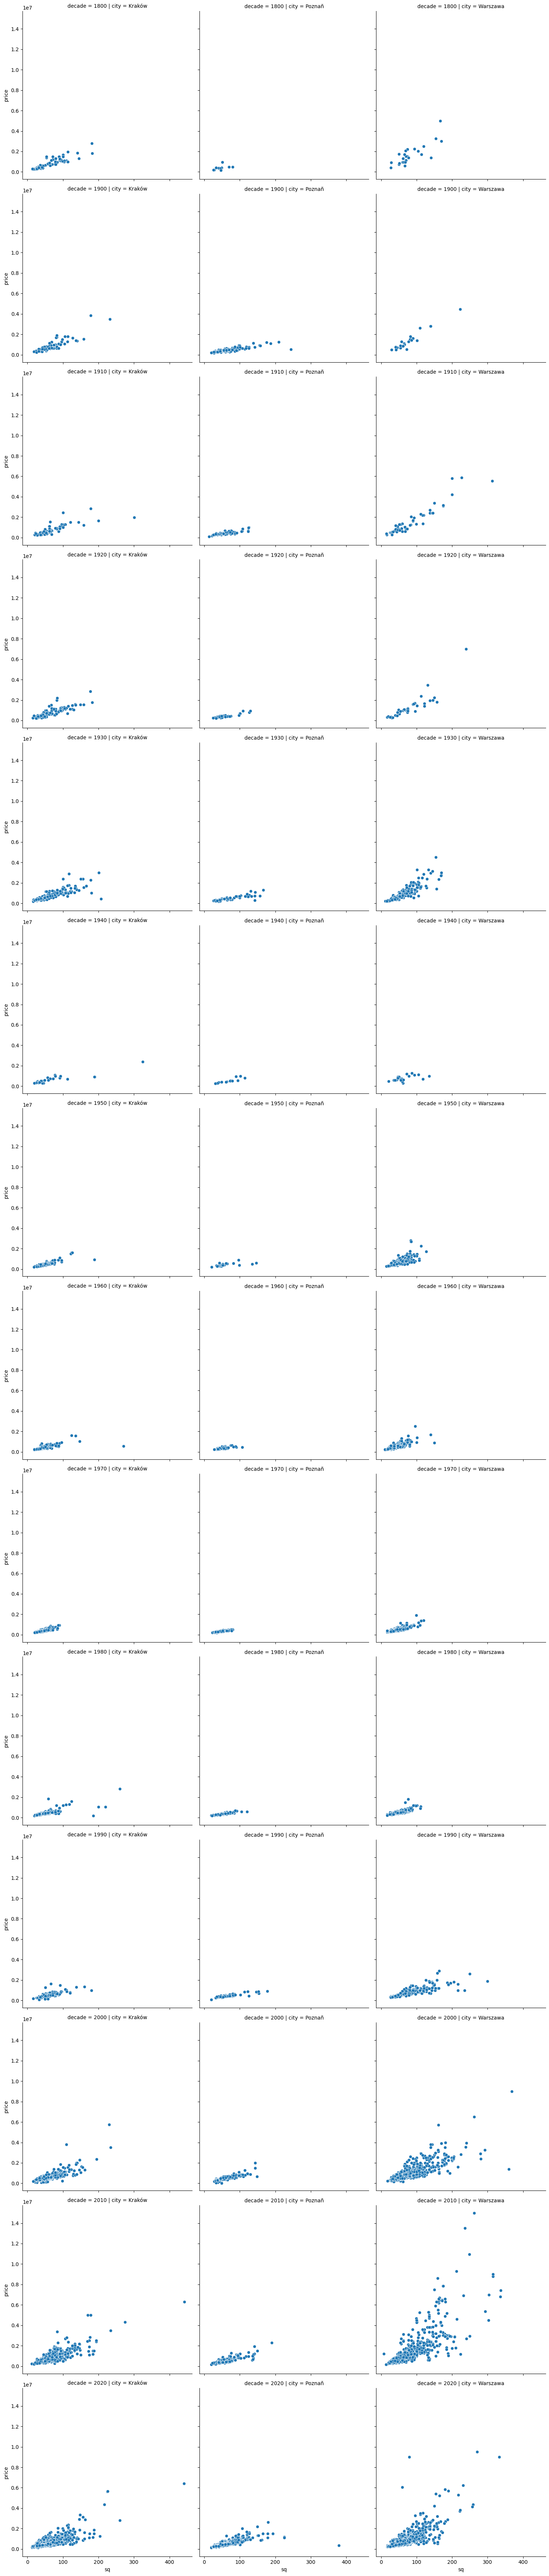

In [267]:
sns.relplot(x='sq', y='price', data=price_df3, kind='scatter', col='city', row='decade')

plt.show()

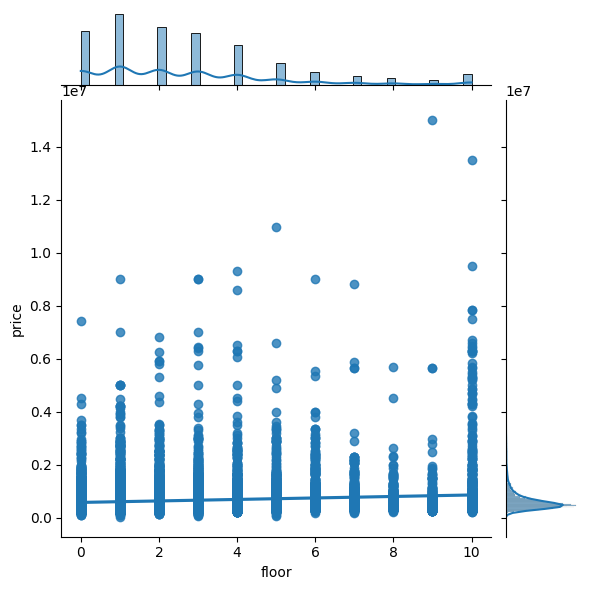

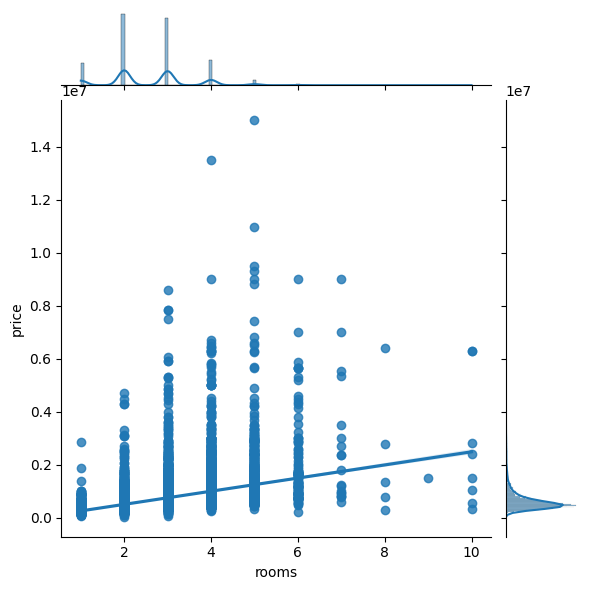

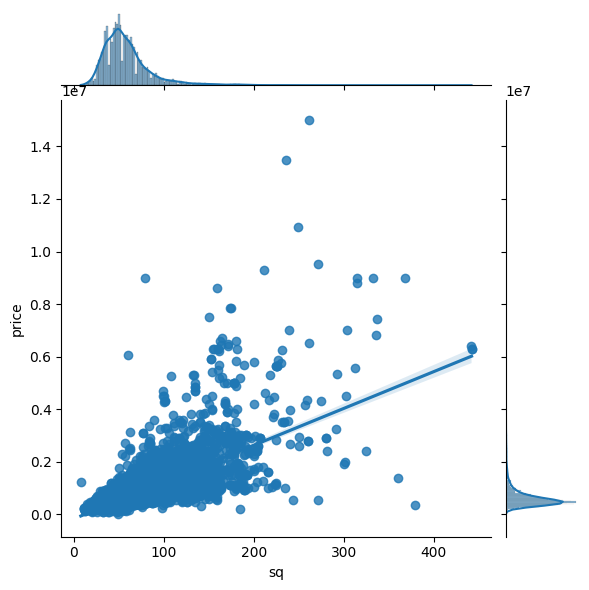

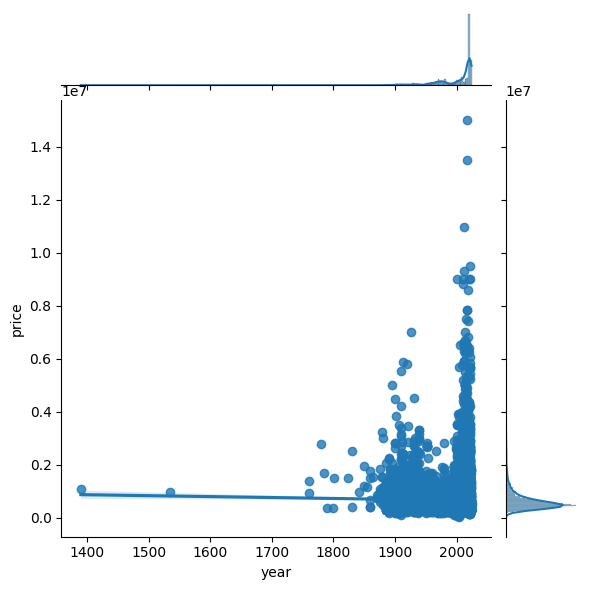

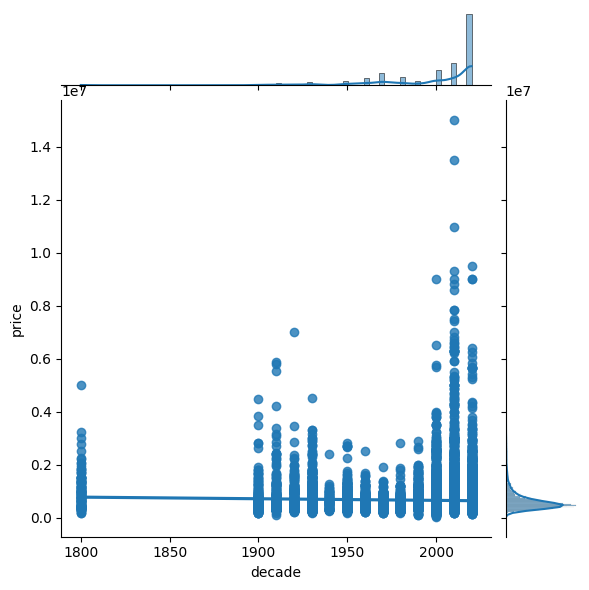

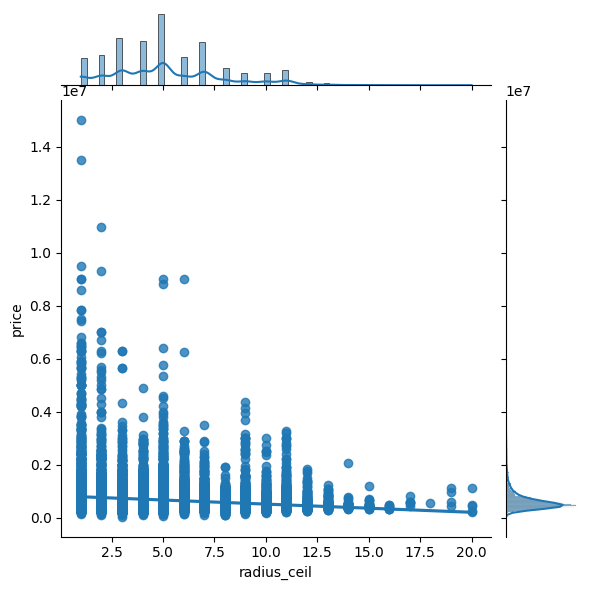

In [430]:
for col in features_short2:
    sns.jointplot(data=price_df3, x=col, y='price', kind = 'reg')
    plt.show()

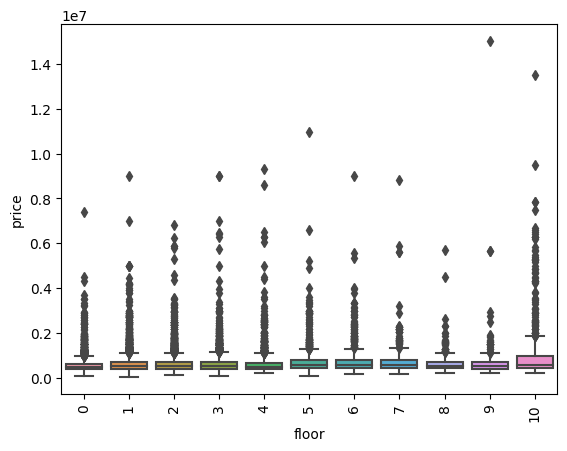

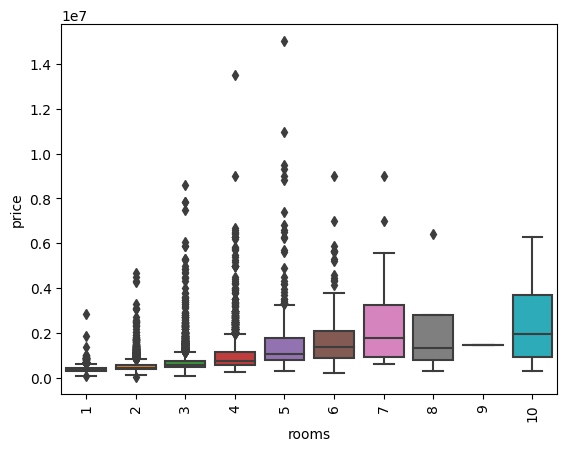

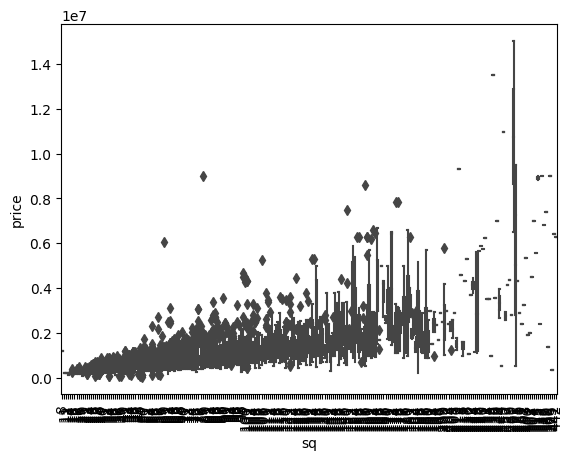

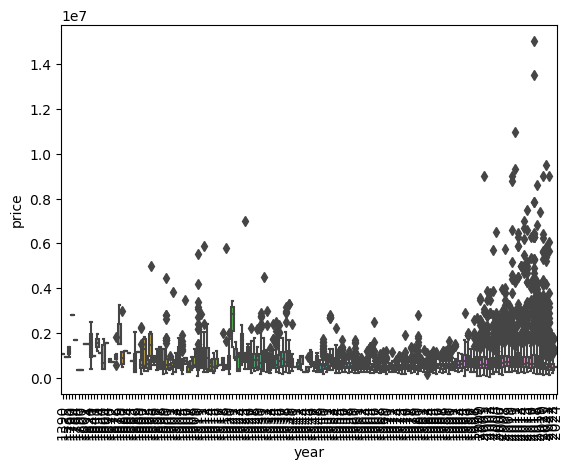

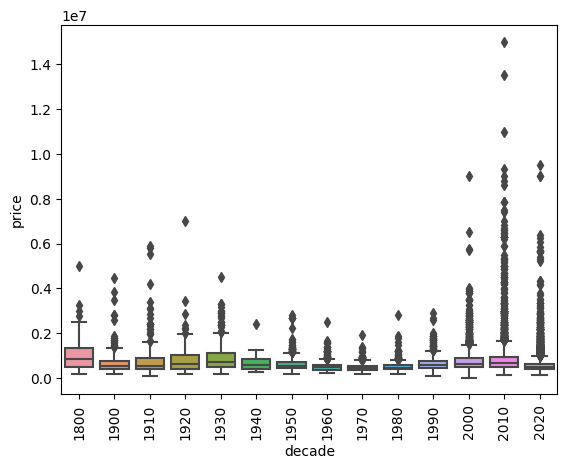

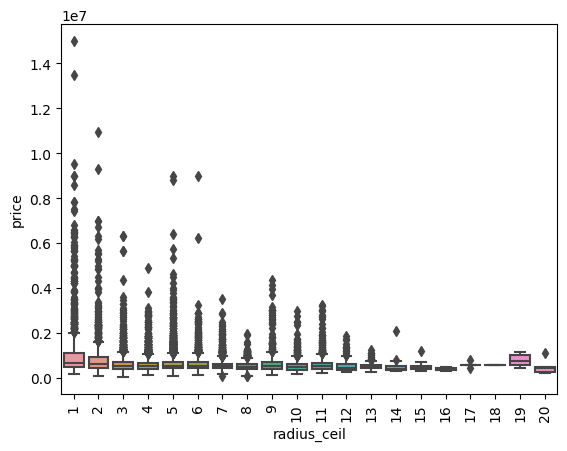

In [431]:
for col in features_short2:
    sns.boxplot(data=price_df3, x=col, y='price')
    plt.xticks(rotation=90)
    plt.show()

# !!!!! 2.2 heatmap, jointplot !!!

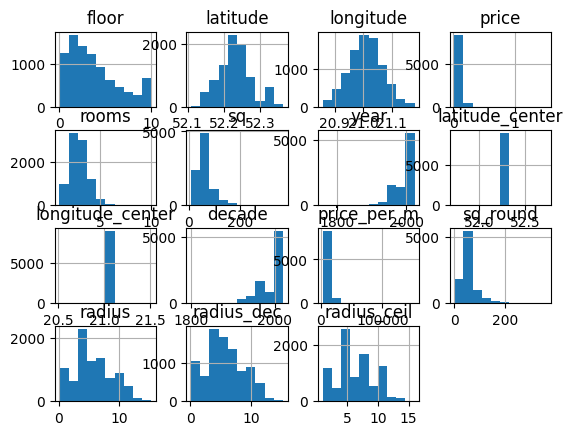

In [456]:
warsaw_df.hist()
plt.show()

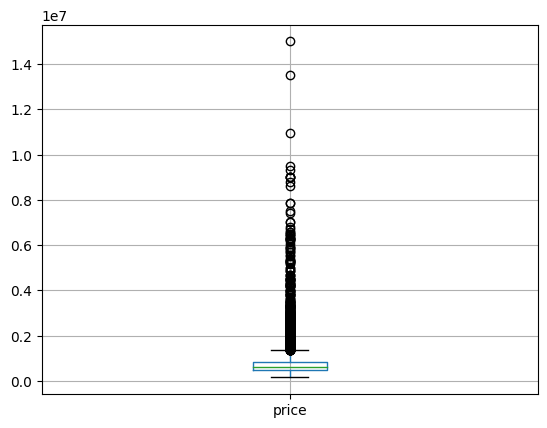

In [459]:
warsaw_df[['price']].boxplot()
plt.show()

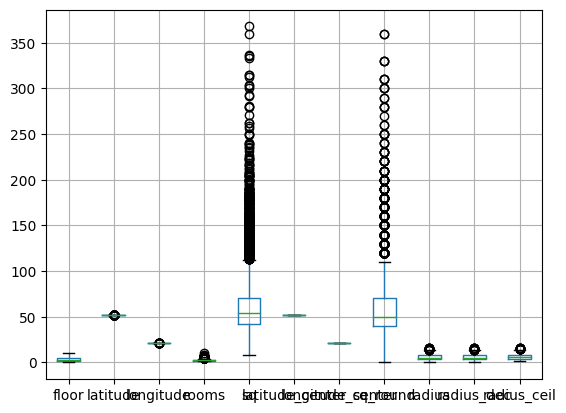

In [463]:
warsaw_df.drop(['price', 'price_per_m', 'year', 'decade'], axis=1).boxplot()
plt.show()

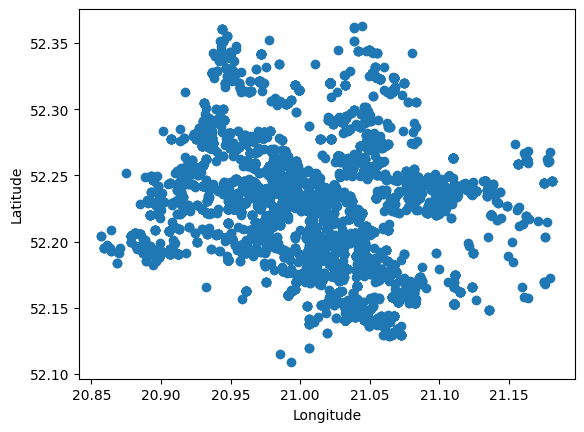

In [499]:
plt.scatter(warsaw_df['longitude'], warsaw_df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

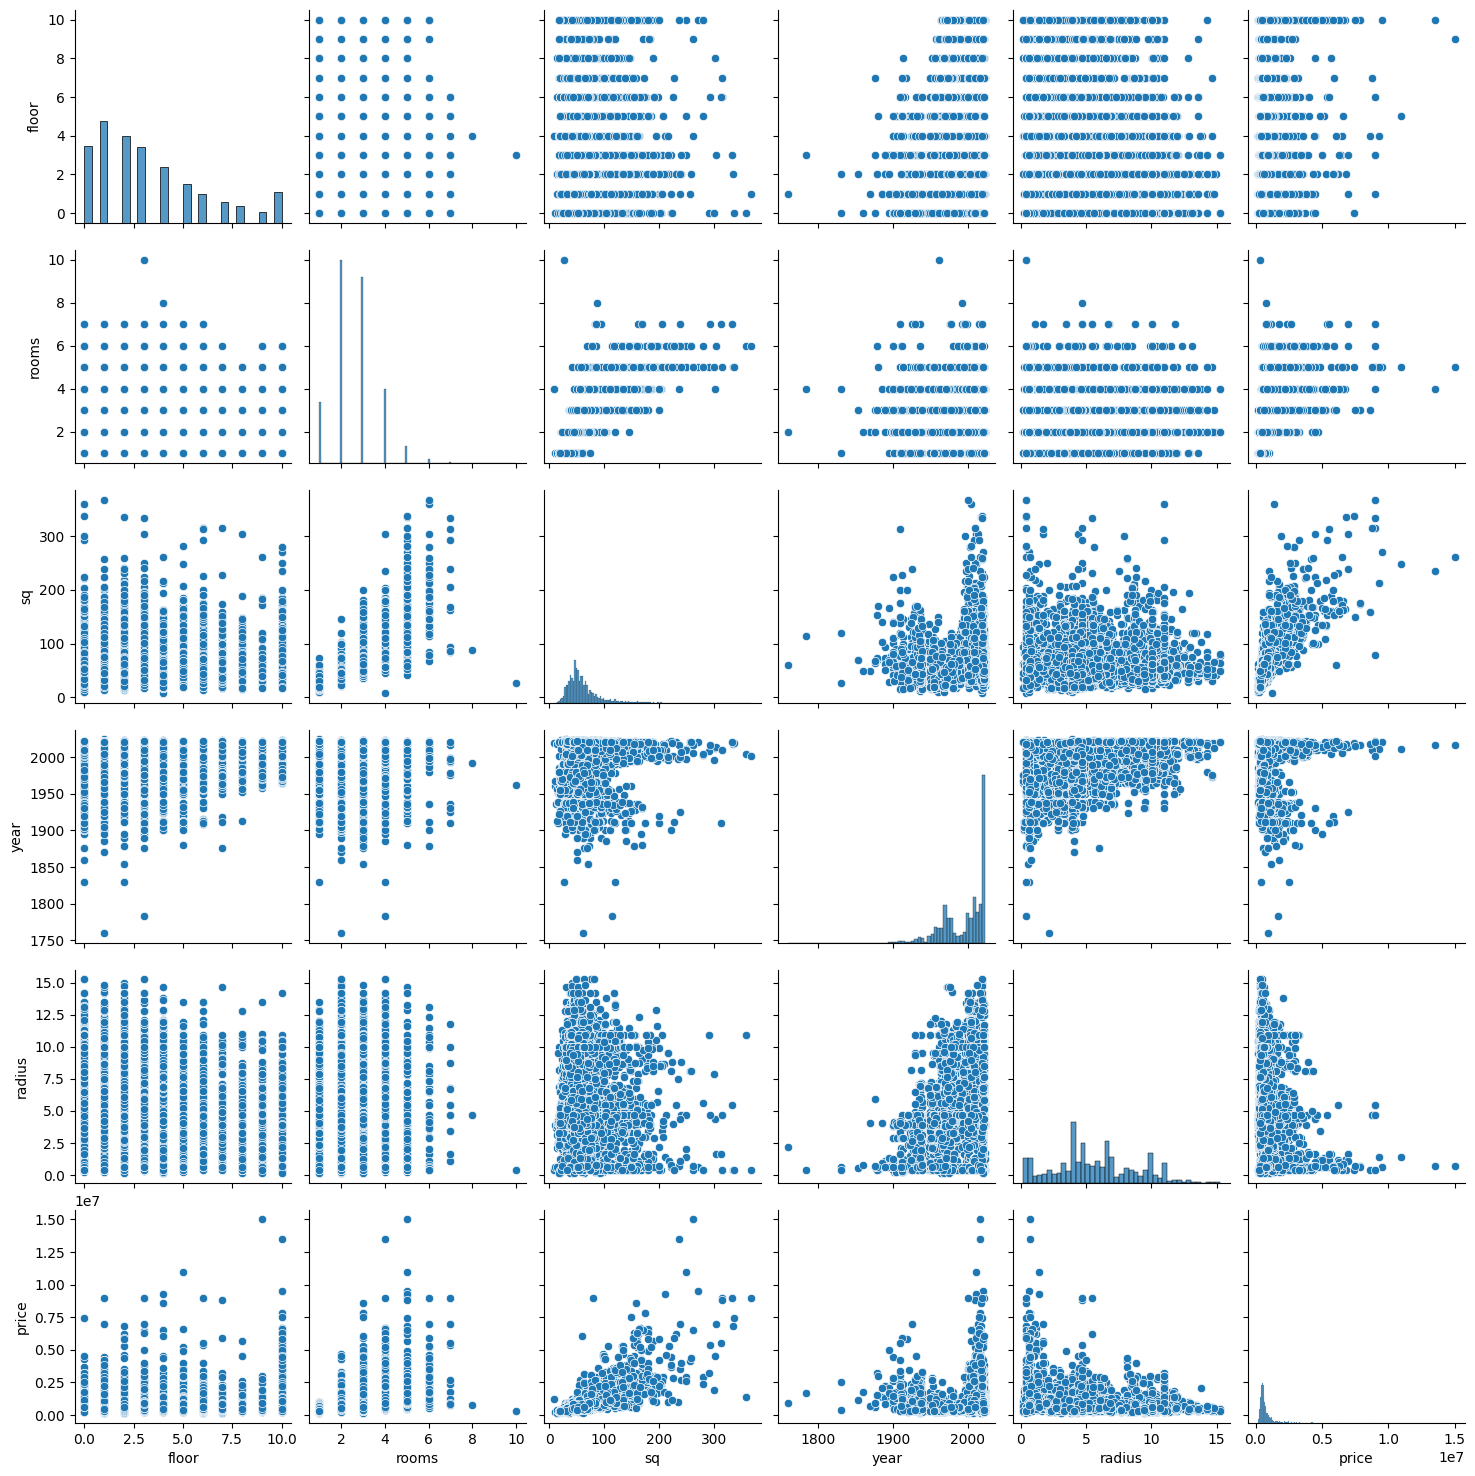

In [455]:
sns.pairplot(warsaw_df[['floor','rooms','sq','year','radius','price']])
plt.show()

In [503]:
1100 / 2.6

423.07692307692304

# 3. Linear Regression

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict


In [ ]:
# NEED Scaler !!!!

# Feature Engineering for Machine Learning in Python - CHAPTER 3
# depends on distribution of every column...

## 3.1 Splitting Data into Training and Testing Sets

In [486]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer


In [480]:
features_reg

['floor', 'rooms', 'sq', 'year', 'radius_dec']

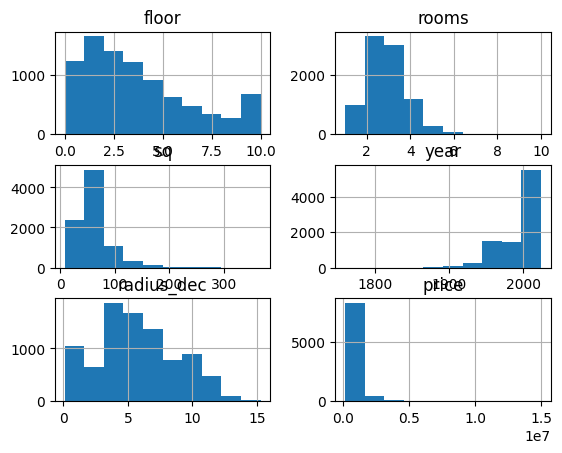

In [481]:
warsaw_df[features_reg + ['price']].hist()
plt.show()

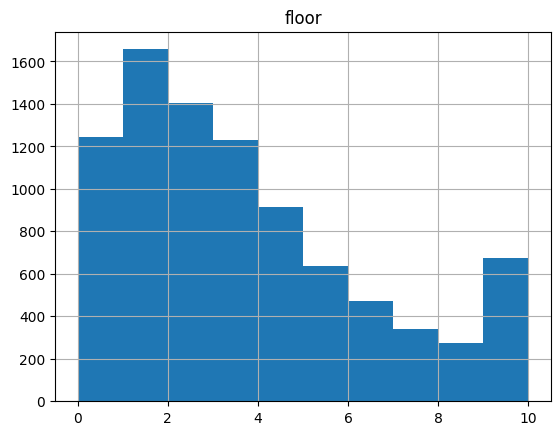

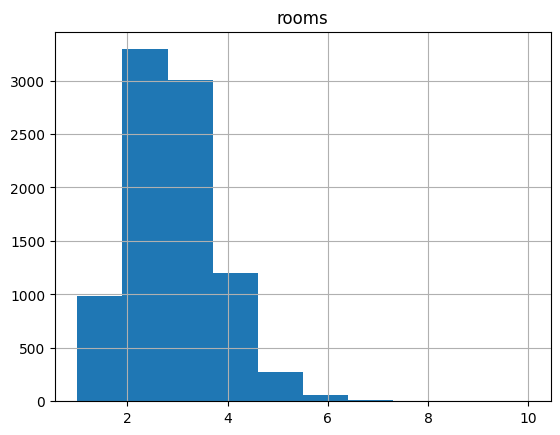

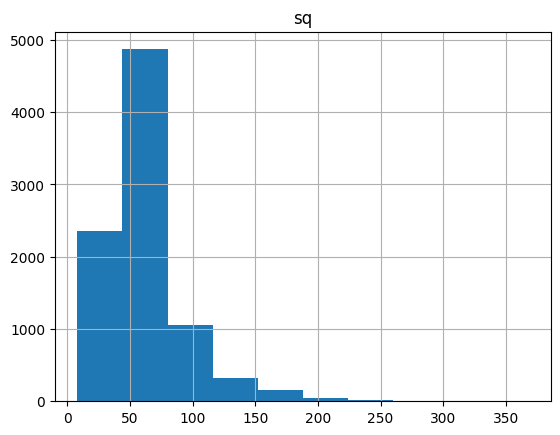

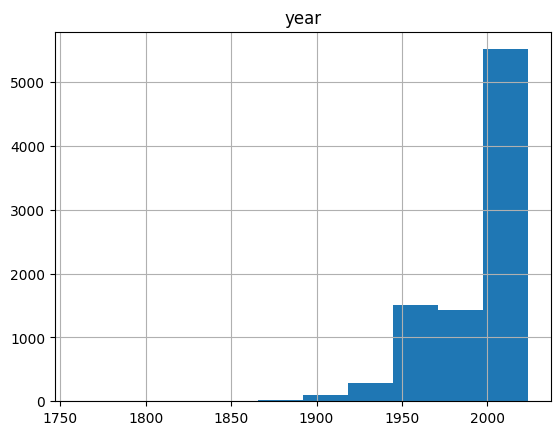

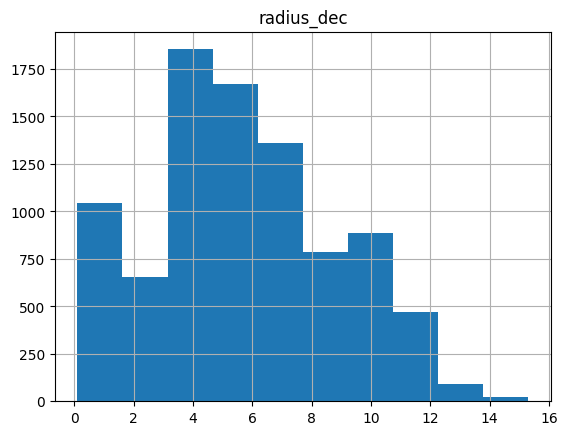

In [485]:
for col in features_reg:
    warsaw_df[col].hist()
    plt.title(col)
    plt.show()

In [489]:
MM_scaler = MinMaxScaler()
st_scaler = StandardScaler()
log_scaler = PowerTransformer()


In [490]:
MM_scaler.fit(warsaw_df[['floor']])
warsaw_df['normalized_floor'] = MM_scaler.transform(warsaw_df[['floor']])

MM_scaler.fit(warsaw_df[['rooms']])
warsaw_df['normalized_rooms'] = MM_scaler.transform(warsaw_df[['rooms']])

log_scaler.fit(warsaw_df[['sq']])
warsaw_df['normalized_sq'] = log_scaler.transform(warsaw_df[['sq']])

MM_scaler.fit(warsaw_df[['year']])
warsaw_df['normalized_year'] = MM_scaler.transform(warsaw_df[['year']])

MM_scaler.fit(warsaw_df[['radius_dec']])
warsaw_df['normalized_radius_dec'] = MM_scaler.transform(warsaw_df[['radius_dec']])

# target
MM_scaler.fit(warsaw_df[['price']])
warsaw_df['normalized_price'] = MM_scaler.transform(warsaw_df[['price']])

In [493]:
features_reg_normalized = ['normalized_'+name for name in features_reg]

In [494]:
warsaw_df2 = warsaw_df[features_reg_normalized + ['normalized_price']]
warsaw_df2.head()

,normalized_floor,normalized_rooms,normalized_sq,normalized_year,normalized_radius_dec,normalized_price
0,0.3,0.000000,-2.085851,0.988636,0.447368,0.006098
1,0.1,0.444444,1.411197,0.984848,0.210526,0.056970
2,1.0,0.555556,3.112900,0.920455,0.361842,0.184512
3,0.3,0.333333,0.339957,0.840909,0.684211,0.031313
4,0.1,0.000000,-0.733434,0.905303,0.440789,0.018788


In [495]:
def reg_score(df, features_reg, target):
    X = df[features_reg]
    y = np.array(df[[target]].astype('int'))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred_simple = reg.predict(X_test)

    # R-squared, RMSE
    return reg.score(X_test, y_test), mean_squared_error(y_test, y_pred_simple, squared=False)

In [496]:
print(reg_score(warsaw_df, features_reg_normalized, 'normalized_price'))
# print(reg_score(krakow_df, features_reg_normalized, 'price'))
# print(reg_score(poznan_df, features_reg_normalized, 'price'))

(-0.00037707390648566985, 0.019414730885301035)


# 4. Random Forest Classifier

In [449]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = warsaw_df[features_reg]
y = np.array(warsaw_df['price'].astype('int'))
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(accuracy_score(y_test, rf.predict(X_test)))

0.12551828119110442


In [452]:
X = poznan_df[features_reg]
y = np.array(poznan_df['price'].astype('int'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(accuracy_score(y_test, rf.predict(X_test)))
print(rf.feature_importances_)

0.08880666049953746
[0.20148601 0.0624284  0.32899742 0.15121797 0.2558702 ]


In [453]:
mask = rf.feature_importances_ > 0.2
X_reduced = X.loc[:, mask]
print(X_reduced.columns)

Index(['floor', 'sq', 'radius_dec'], dtype='object')


# ====== ANCHOR ======

In [445]:
## Scailing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [195]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()

y_pred_kf = cross_val_predict(reg, X, y, cv=kf)
cv_results = cross_val_score(reg, X, y, cv=kf)


In [196]:
print(cv_results)

[0.58769885 0.64678398 0.61398868 0.63771098 0.65624078 0.64188128]


In [197]:
print(np.mean(cv_results), np.std(cv_results))

0.6307174253571229 0.023142911551908875


In [178]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.5919034  0.65510444]


In [198]:
# y_pred_kf

## !!! to predict price by example features

In [209]:
X_check = pd.DataFrame({
    'floor': 3, 
    'rooms': 1, 
    'sq': 24, 
    'year': 2021
}, index=[0])
X_check

,floor,rooms,sq,year
0,3,1,24,2021


In [210]:
# X_check = pd.concat([X_check,X_check,X_check,X_check,X_check,X_check])
# X_check

In [212]:
reg.predict(X_check)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [213]:
# cross_val_predict(reg, X_check, cv=kf)
# cross_val_predict(reg, X_check, y, cv=kf)

In [ ]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

In [ ]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

In [ ]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# Linear Classifier (?)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        5000       0.00      0.00      0.00         1
      150000       0.00      0.00      0.00         1
      161000       0.00      0.00      0.00         1
      170000       0.00      0.00      0.00         1
      177000       0.00      0.00      0.00         0
      199000       0.00      0.00      0.00         1
      209000       0.00      0.00      0.00         0
      210000       0.00      0.00      0.00         1
      220000       0.00      0.00      0.00         1
      223000       0.00      0.00      0.00         1
      223900       0.00      0.00      0.00         1
      224600       0.00      0.00      0.00         1
      224636       0.17      1.00      0.29         1
      224727       0.50      1.00      0.67         3
      225000       0.50      1.00      0.67         1
      225500   

/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Preci

In [ ]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

In [ ]:
 from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              "solver": ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

In [ ]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

In [ ]:
'''
- to add coordinates? or the distance from the city center?
- gridsearch/randomsearch
- to predict
'''